In [21]:
from probs.gpt2 import next_distribution


In [22]:
text = 'Devs complain that words like "Monad" and "Functor" are confusing'

Top 50 probable next bytes:
' ': 0.566865
'.': 0.242050
',': 0.151697
'l': 0.017328
';': 0.009763
':': 0.005075
'\xc4': 0.002171
'\xc3': 0.001834
'!': 0.000925
'/': 0.000389
'-': 0.000352
'?': 0.000349
')': 0.000311
'"': 0.000167
'i': 0.000113
''': 0.000069
'f': 0.000061
'e': 0.000053
'*': 0.000037
's': 0.000032
']': 0.000032
'a': 0.000031
'<': 0.000024
't': 0.000020
'n': 0.000018
'u': 0.000017
'o': 0.000015
'L': 0.000012
'y': 0.000011
'p': 0.000011
'(': 0.000010
'c': 0.000010
'r': 0.000009
'm': 0.000008
'T': 0.000008
'b': 0.000008
'[': 0.000006
'A': 0.000006
'w': 0.000005
'_': 0.000005
'1': 0.000005
'W': 0.000004
'C': 0.000004
'h': 0.000004
'x': 0.000004
'S': 0.000004
'F': 0.000003
'I': 0.000003
'B': 0.000003
'2': 0.000003
Entropy at current position: 1.6520 bits


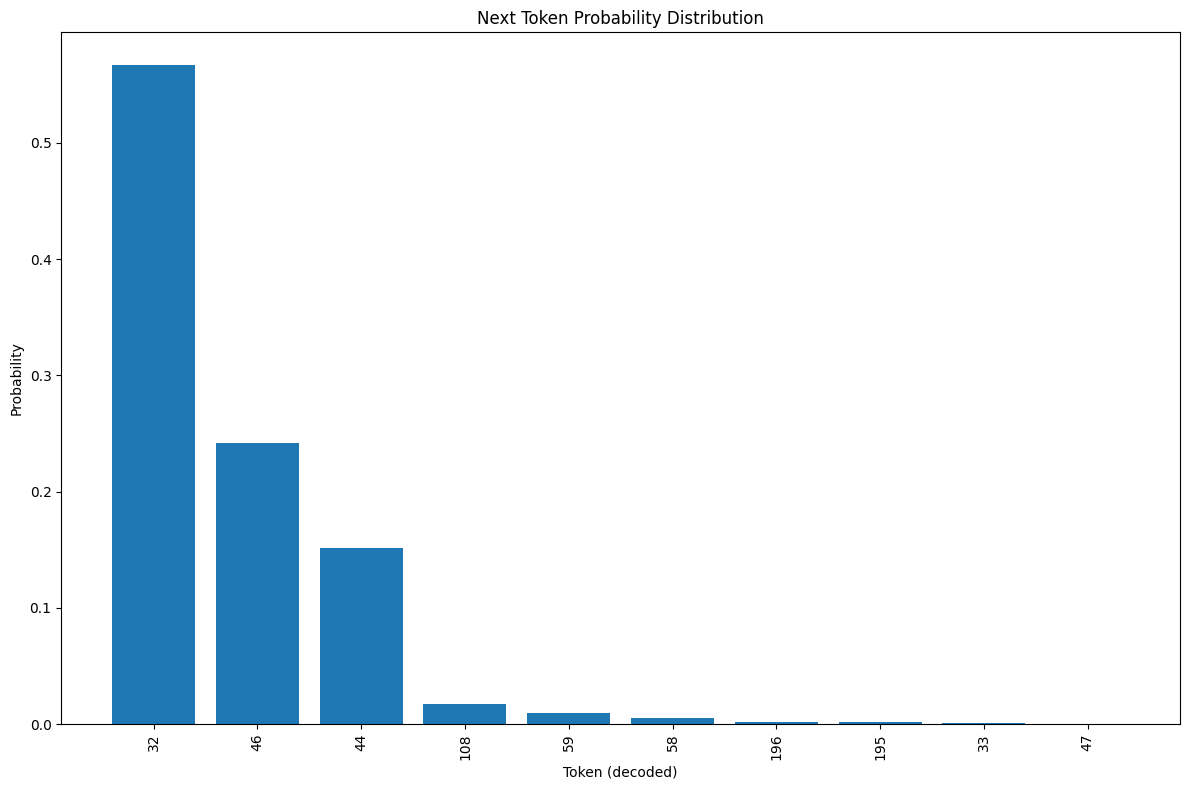

In [23]:
from probs.analysis import plot_probs
from math import log2

# First, let's look at the distribution for the next byte
probs = next_distribution(text)

# Print the top 50 most probable bytes
top_50 = sorted(probs.items(), key=lambda x: x[1], reverse=True)[:50]
print("Top 50 probable next bytes:")
for byte_val, prob in top_50:
    char_repr = chr(byte_val) if 32 <= byte_val <= 126 else f"\\x{byte_val:02x}"
    print(f"'{char_repr}': {prob:.6f}")

# Calculate entropy
entropy = -sum([p * log2(p) for t, p in probs.items()])
print(f"Entropy at current position: {entropy:.4f} bits")

# Plot the distribution
plot_probs(probs)




AUTOREGRESSIVE ANALYSIS
Starting with: ' '
Analyzing generation of: 'Devs complain that words like "Monad" and "Functor" are confusing'
--------------------------------------------------

Position 1: Generating 'D'


Entropy at this position: 5.1927 bits
Probability of 'D': 0.004700
Surprise value: 7.7332 bits
Top 5 predicted bytes:
   : 0.233820
  \xc4: 0.081979
  i: 0.055163
  a: 0.046849
  .: 0.027243

Position 2: Generating 'e'
Entropy at this position: 4.5291 bits
Probability of 'e': 0.025988
Surprise value: 5.2660 bits
Top 5 predicted bytes:
   : 0.323319
  .: 0.089791
  a: 0.060536
  i: 0.054647
  o: 0.037458

Position 3: Generating 'v'
Entropy at this position: 4.4217 bits
Probability of 'v': 0.010548
Surprise value: 6.5669 bits
Top 5 predicted bytes:
   : 0.375466
  a: 0.061474
  i: 0.047529
  -: 0.031309
  e: 0.026988

Position 4: Generating 's'
Entropy at this position: 4.0069 bits
Probability of 's': 0.010947
Surprise value: 6.5133 bits
Top 5 predicted bytes:
   : 0.398754
  i: 0.080379
  a: 0.073590
  .: 0.049853
  o: 0.047173

Position 5: Generating ' '
Entropy at this position: 2.3181 bits
Probability of ' ': 0.643474
Surprise value: 0.6360 bits
Top 5 predicted bytes:
   : 0.643474
 

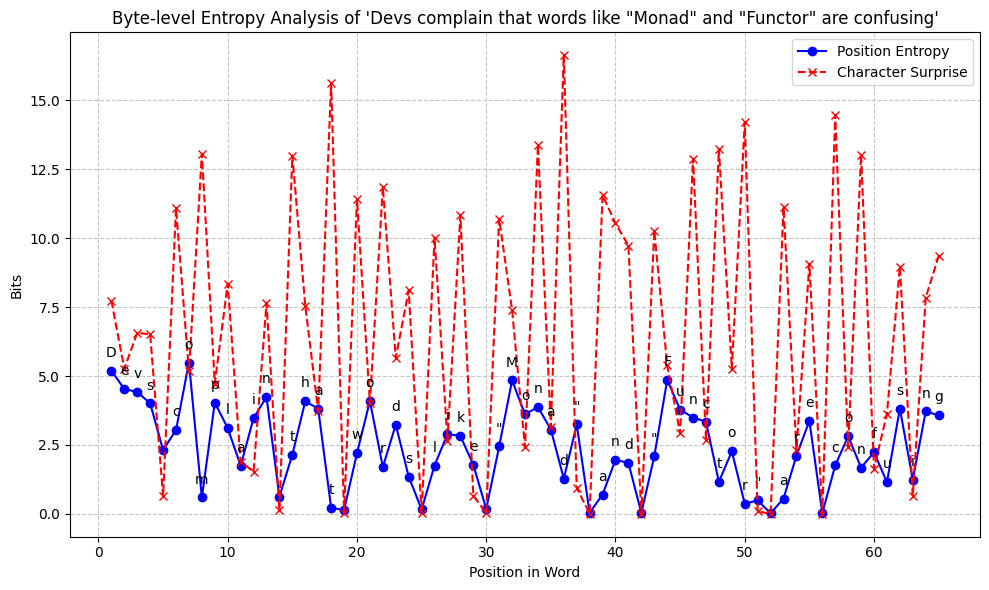

In [24]:
from probs.analysis import autoregressive_byte_analysis

# Now analyze a word autoregressively
print("\n" + "="*60)
print("AUTOREGRESSIVE ANALYSIS")
print("="*60)
results = autoregressive_byte_analysis(" ", next_distribution, target_word=text)
    

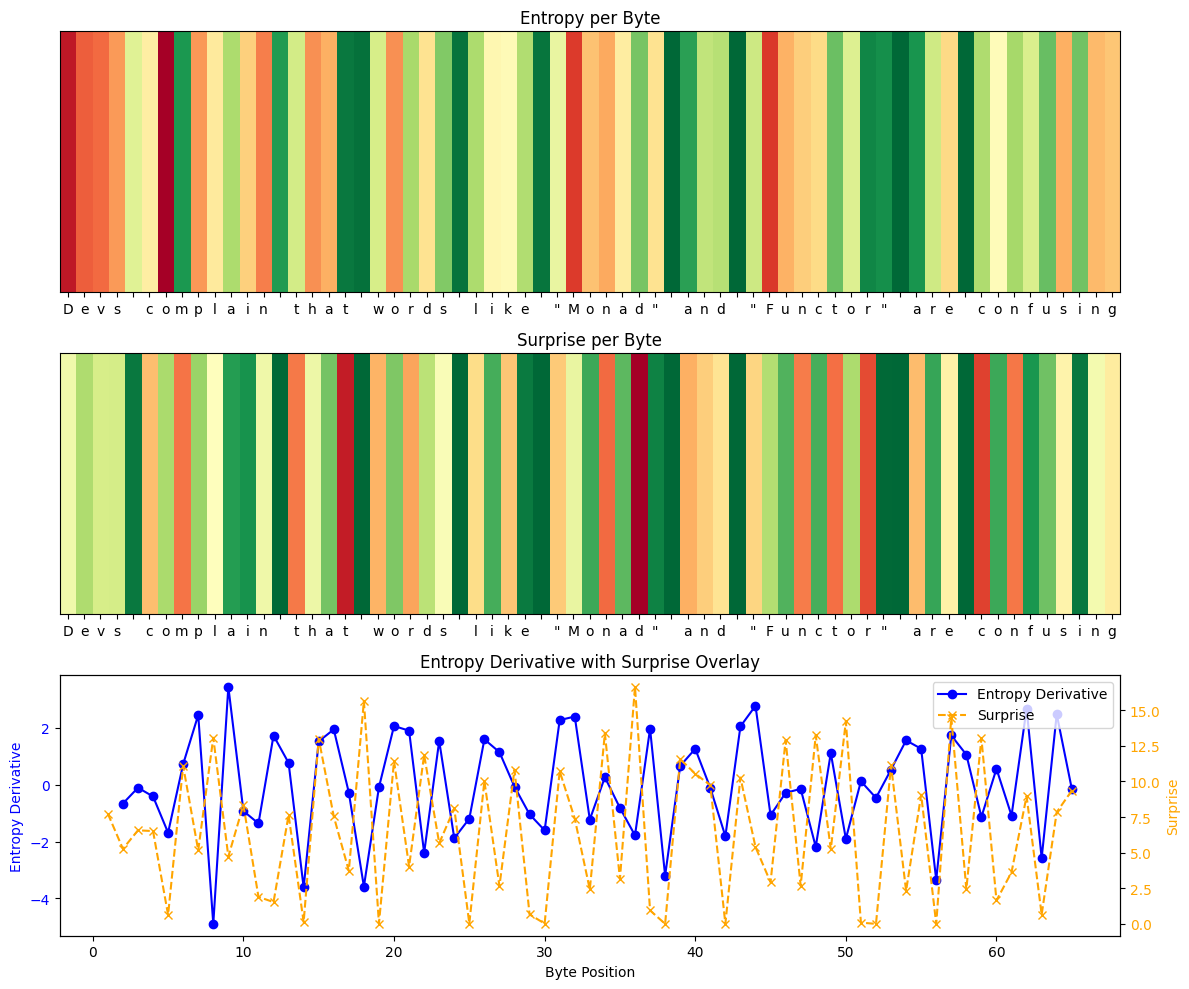

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data from results (assumes results is defined)
positions = [r['position'] for r in results]
entropies = [r['entropy'] for r in results]
surprises = [r['surprise'] for r in results]

# Compute the derivative (discrete difference) of the entropy values
entropy_deriv = np.diff(entropies)
derivative_positions = positions[1:]  # positions for derivative (skip first)

# Create 2D arrays of shape (1, N) for imshow for entropy and surprise
entropy_array = np.array(entropies).reshape(1, -1)
surprise_array = np.array(surprises).reshape(1, -1)

# Create labels for each byte position (assumes text is defined)
labels = [text[i-1] for i in positions]

# Set up the subplots: one for entropy, one for surprise, and one for the combined derivative/surprise plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot entropy as a colorbar-like image
im1 = ax1.imshow(entropy_array, aspect="auto", cmap="RdYlGn_r")
ax1.set_title("Entropy per Byte")
ax1.set_yticks([])  # Remove y-axis ticks
ax1.set_xticks(np.arange(len(positions)))
ax1.set_xticklabels(labels)

# Plot surprise as a colorbar-like image
im2 = ax2.imshow(surprise_array, aspect="auto", cmap="RdYlGn_r")
ax2.set_title("Surprise per Byte")
ax2.set_yticks([])
ax2.set_xticks(np.arange(len(positions)))
ax2.set_xticklabels(labels)

# Plot the derivative of entropy on ax3
ax3.plot(derivative_positions, entropy_deriv, marker='o', linestyle='-', color='blue', label="Entropy Derivative")
ax3.set_xlabel("Byte Position")
ax3.set_ylabel("Entropy Derivative", color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title("Entropy Derivative with Surprise Overlay")

# Overlay the surprise graph using a secondary y-axis
ax3_surprise = ax3.twinx()
ax3_surprise.plot(positions, surprises, marker='x', linestyle='--', color='orange', label="Surprise")
ax3_surprise.set_ylabel("Surprise", color='orange')
ax3_surprise.tick_params(axis='y', labelcolor='orange')

# Add legends to differentiate the two plots
lines = ax3.get_lines() + ax3_surprise.get_lines()
labels = [line.get_label() for line in lines]
ax3.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()